In [1]:
%matplotlib inline

In [2]:
import numpy as np

from river.stats import Mean, RollingMean
from river import synth
from river import drift

from generators import Gaussian

import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
data_stream = np.concatenate(
    (np.random.uniform(low=0, high=1, size=1000),
    np.random.uniform(low=1, high=2, size=1000))
)

In [4]:
data_stream

array([0.37454012, 0.95071431, 0.73199394, ..., 1.06895802, 1.05705472,
       1.28218707])

In [5]:
np.mean(data_stream[1000:])

1.5070173051792035

In [6]:
mean = Mean()
vals = []
for n in data_stream:
    vals.append(mean.update(n).get())

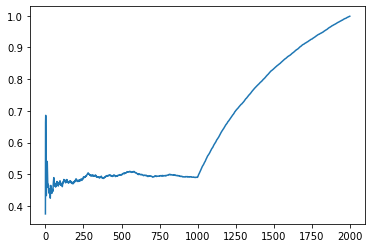

In [7]:
plt.plot(vals)


In [8]:
mean = Mean()
vals = []
stream = Gaussian(mu=.5, sigma=.5, seed=42)
for i, t in enumerate(stream):
    if i == 10000:
        break
    vals.append(mean.update(t[1]).get())

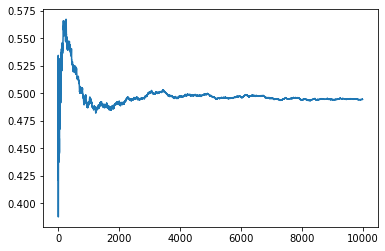

In [9]:
plt.plot(vals)

In [10]:
def get_stream():
    seed=42
    return synth.ConceptDriftStream(
        stream=synth.ConceptDriftStream(stream=Gaussian(0, .01, seed=seed),
                                        drift_stream=Gaussian(2, .0, seed=seed),
                                        width=1000, position=5000, seed=seed),
        drift_stream=Gaussian(1, .0, seed=seed), width=1000, position=10000, seed=seed)
stream = get_stream()
mean = Mean()
rolling_mean = RollingMean(window_size=1000)
vals = []
rolling_vals = []
for i, t in enumerate(stream):
    if i == 20000:
        break
    vals.append(mean.update(t[1]).get())
    rolling_vals.append(rolling_mean.update(t[1]).get())

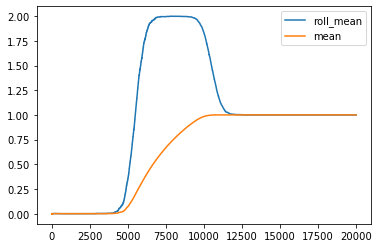

In [11]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()

In [12]:
stream = get_stream()
adwin = drift.ADWIN()
drift_pos = []
for i, t in enumerate(stream):
    if i == 20000:
        break
    adwin.update(t[1])
    if adwin.change_detected:
        print(f'Drift detected at {i}')
        drift_pos.append(i)
        adwin.reset()
        

Drift detected at 4383
Drift detected at 4895
Drift detected at 5375
Drift detected at 6335
Drift detected at 9599
Drift detected at 10175
Drift detected at 10783


Text(0.5, 1.0, 'ADWIN')

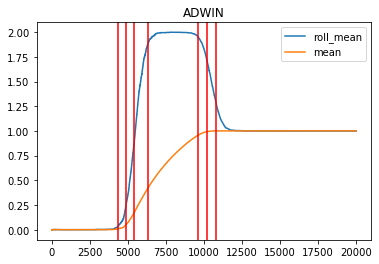

In [13]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()
for x in drift_pos:
    plt.axvline(x, color='r')
plt.title('ADWIN')

In [14]:
from uadwin import UADWIN

stream = get_stream()
uadwin = UADWIN(delta=.002)
drift_pos = []
for i, t in enumerate(stream):
    if i == 20000:
        break
    in_drift, _ = uadwin.update(t[1])
    if in_drift:
        print(f'Drift detected at {i}')
        drift_pos.append(i)
        uadwin.reset()

Drift detected at 927
Drift detected at 4255
Drift detected at 4415
Drift detected at 4607
Drift detected at 4831
Drift detected at 5119
Drift detected at 5439
Drift detected at 5631
Drift detected at 5823
Drift detected at 9439
Drift detected at 9919
Drift detected at 10175
Drift detected at 10431
Drift detected at 10591
Drift detected at 10719


Text(0.5, 1.0, 'UADWIN')

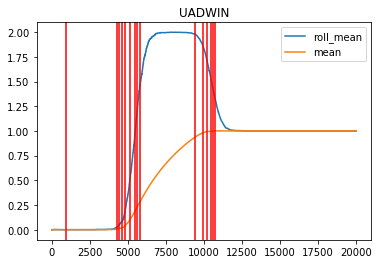

In [15]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()
for x in drift_pos:
    plt.axvline(x, color='r')
plt.title('UADWIN')